In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"
aspect_ratio = 16./9.

In [28]:
def calc_Ptop_scaling(r):
    return r**(3./2)*np.exp(-r)

def calc_P_bubble(tau, T=72.8e-3):
    # 72.8 millinewtons (mN) per meter for water from wikipedia
    
    return T/3./tau

def calc_P_acoustic(V_dot, kappa, V_dot_0, kappa_bubble, tau, T=72.8e-3):
    return kappa*V_dot*np.exp(-(V_dot/V_dot_0)**(2./3)) + kappa_bubble*T/3./tau

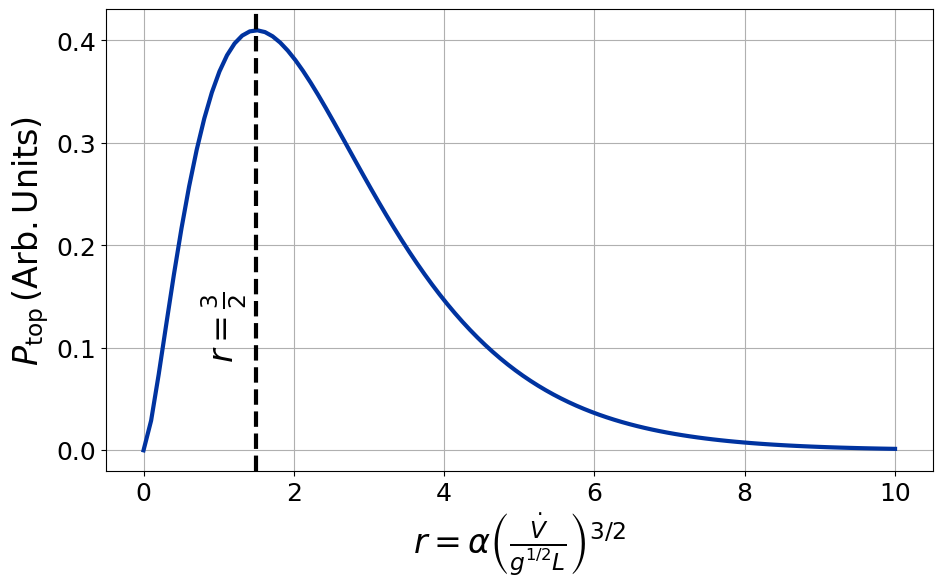

In [3]:
fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

r = np.linspace(0., 10., 100)
Ptop_scaling = calc_Ptop_scaling(r)

ax.plot(r, Ptop_scaling, lw=3, color=BoiseState_blue)

ax.axvline(3./2, lw=3, ls='--', color='k')
ax.text(0.75, 0.1, r'$r = \frac{3}{2}$', rotation=90, fontsize=24)

ax.tick_params(labelsize=18)
ax.set_xlabel(r'$r = \alpha \left( \frac{\dot{V}}{g^{1/2} L} \right)^{3/2}$', fontsize=24)
ax.set_ylabel(r'$P_{\rm top}\,\left( {\rm Arb. Units} \right)$', fontsize=24)
ax.grid(True)

# fig.savefig("../figures/P_top_scaling.jpg", bbox_inches="tight", dpi=300)

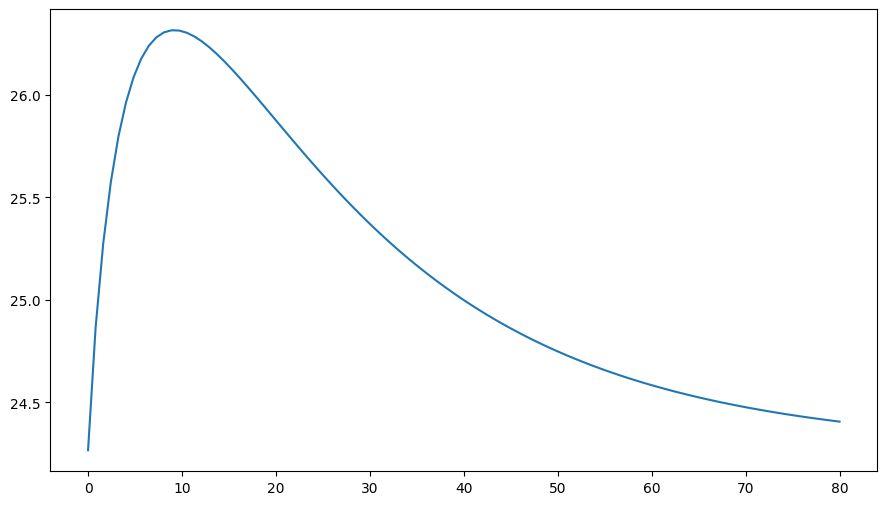

In [30]:
fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

V_dot = np.linspace(0., 80., 100) # m^3/s
kappa = 1.
kappa_bubble = 1.
V_dot_0 = 5.
tau = 1e-3 # 1 millisecond 

P_acoustic = calc_P_acoustic(V_dot, kappa, V_dot_0, kappa_bubble, tau)
ax.plot(V_dot, P_acoustic)

[ 2.25183190e+00  1.62294929e+01  1.52397714e+00 -8.24008356e-03]


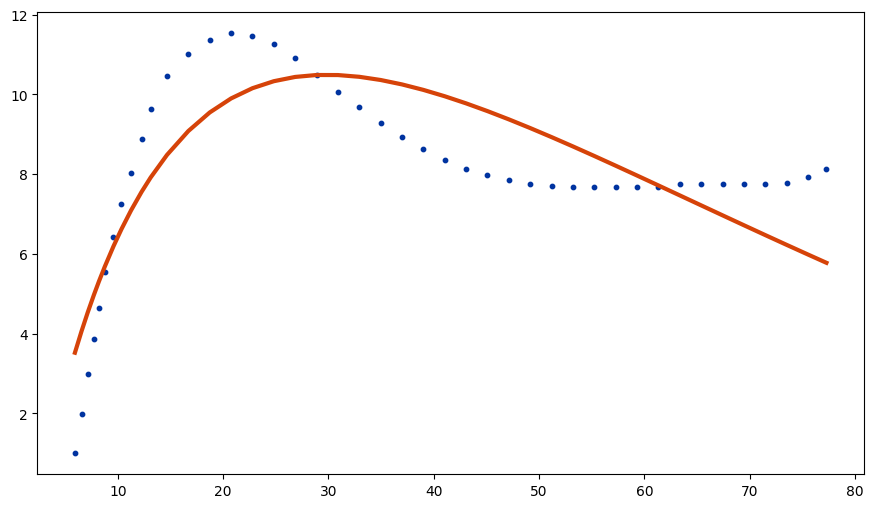

In [34]:
fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

# Fitting Anderson's data
data_filename = "Anderson_figure_top_panel.csv"

data = np.genfromtxt(data_filename, delimiter=',', names=True)
data['acoustic_power'] /= np.min(data['acoustic_power'])

popt, pcov = curve_fit(calc_P_acoustic, data['discharge_rate'], data['acoustic_power'], 
                       p0=[1., 5., 1., 1e-3])
print(popt)

unc = np.sqrt(np.diag(pcov))
ax.plot(data['discharge_rate'], calc_P_acoustic(data['discharge_rate'], *popt), lw=3, color=BoiseState_orange)
# ax.plot(data['discharge_rate'], calc_P_acoustic(data['discharge_rate'], 1e-3, 0.5, 1., 1e-3), lw=3, color=BoiseState_orange)

ax.scatter(data['discharge_rate'], data['acoustic_power'], marker='o', color=BoiseState_blue, s=10)